In [1]:
import numpy as np
import cptac
import cnvutils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cptac warning: Your version of cptac (0.8.5) is out-of-date. Latest is 0.8.6. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-e97fa4d69c28>, line 2)


In [2]:
CHROMOSOME = '8'
ARM = 'p'
TRANS_OR_CIS = 'cis'

In [3]:
ttest_results_file = f"{CHROMOSOME}{ARM}_{TRANS_OR_CIS}effects_ttest.tsv"

ttest_results = pd.\
read_csv(ttest_results_file, sep="\t").\
rename(columns={"Name": "protein"}).\
set_index("protein")
id_cols = [col for col in ttest_results.columns if not 'Database_ID' in col]
ttest_results = ttest_results[id_cols]
pvalue_cols = [col for col in ttest_results.columns if 'pvalue' in col]
ttest_results = ttest_results[pvalue_cols]

In [4]:
def get_cancer(val):
    val_list = val.split('_')
    return val_list[0].upper()

In [5]:
ttest_results_long = ttest_results.reset_index().melt(id_vars='protein', var_name='cancer').sort_values('protein')
ttest_results_long['cancer'] = ttest_results_long.cancer.apply(get_cancer)
ttest_results_long

,protein,cancer,value
0,ADAMDEC1,BRCA,8.742524e-01
198,ADAMDEC1,HNSCC,7.556452e-01
495,ADAMDEC1,OVARIAN,3.698054e-01
396,ADAMDEC1,LUAD,1.421191e-01
99,ADAMDEC1,COLON,5.845904e-01
...,...,...,...
395,XPO7,LSCC,5.858279e-04
197,XPO7,COLON,1.746839e-09
98,XPO7,BRCA,1.317128e-08
494,XPO7,LUAD,9.252022e-09


In [6]:
locations = cnvutils.get_gene_locations()
locations = locations.droplevel(1)

In [7]:
results = ttest_results_long.set_index('protein')
results = results.join(locations)
results = results.reset_index()

In [8]:
results

,index,cancer,value,chromosome,start_bp,end_bp,arm
0,ADAMDEC1,BRCA,8.742524e-01,8,24384285.0,24406013.0,p
1,ADAMDEC1,BRCA,8.742524e-01,8,24384285.0,24406013.0,p
2,ADAMDEC1,BRCA,8.742524e-01,8,24384285.0,24406013.0,p
3,ADAMDEC1,HNSCC,7.556452e-01,8,24384285.0,24406013.0,p
4,ADAMDEC1,HNSCC,7.556452e-01,8,24384285.0,24406013.0,p
...,...,...,...,...,...,...,...
1735,XPO7,LUAD,9.252022e-09,8,21919662.0,22006585.0,p
1736,XPO7,LUAD,9.252022e-09,8,21919662.0,22006585.0,p
1737,XPO7,OVARIAN,1.743359e-05,8,21919662.0,22006585.0,p
1738,XPO7,OVARIAN,1.743359e-05,8,21919662.0,22006585.0,p


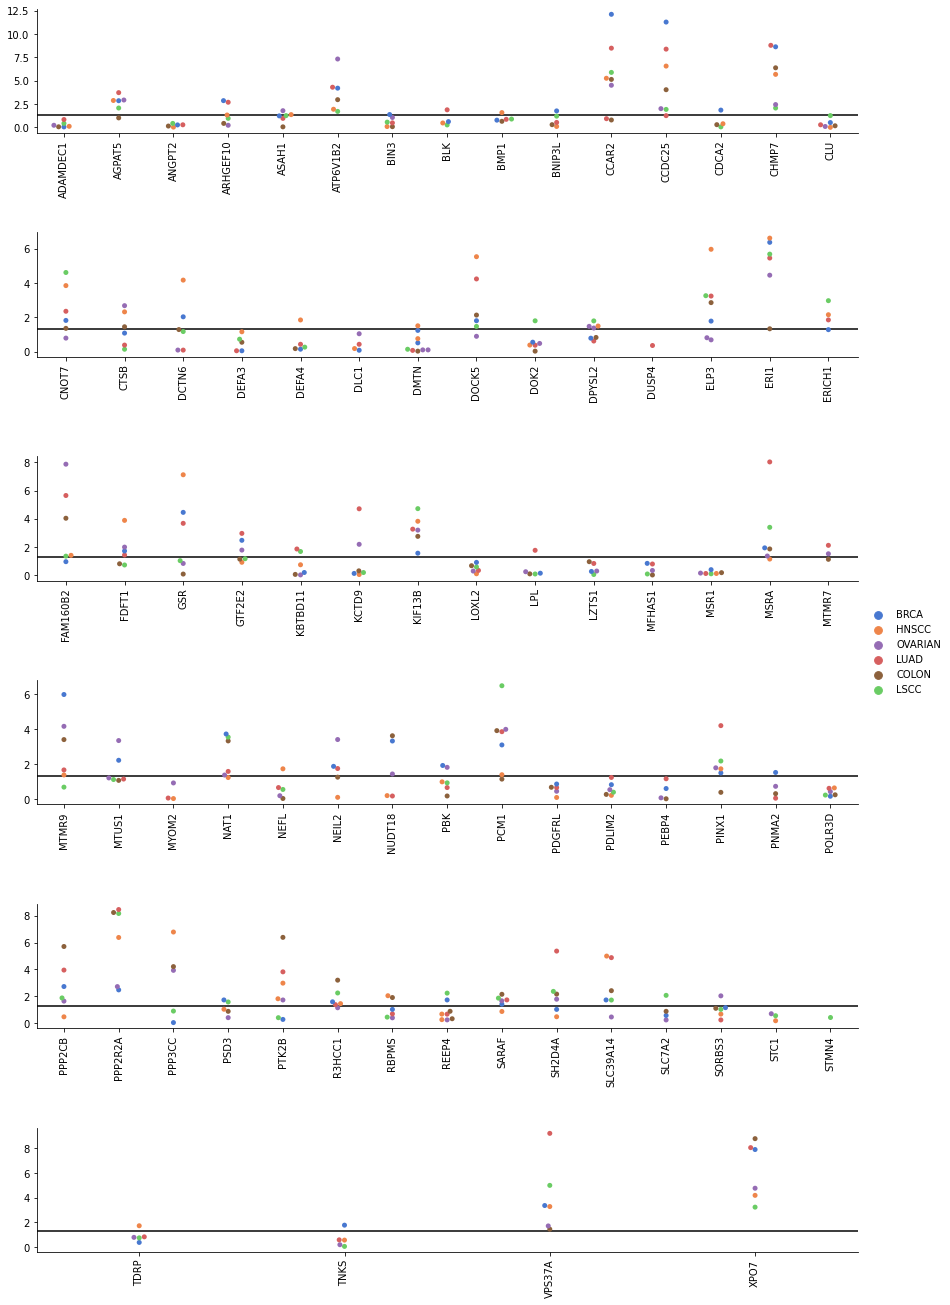

In [9]:
cnvutils.make_pvalue_plot(results, label_column='index', value_column='value', group_column='cancer', labels_per_plot=15)